# EDA
## Analysis

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_FOLDER = '../95_data/titanic-dataset/'
train = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### 数据操作
#### 整体

In [13]:
print(train.shape)  # 行数，列数
print(test.shape[0])
print(test.columns)

(891, 12)
418
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [41]:
train.nunique()  # 每列有几种不同的值

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### 数据探索

In [34]:
test.Fare.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Fare, Length: 418, dtype: bool

In [23]:
test.Fare.mean()

35.627188489208635

In [24]:
test.Fare.std()

55.907576179973844

In [17]:
test.Fare.value_counts().head(4)  # 每个value有多少列

7.75     21
26.00    19
8.05     17
13.00    17
Name: Fare, dtype: int64

In [32]:
fare_unique = test.Fare.unique()
fare_unique_sorted = np.sort(fare_unique)
print(fare_unique_sorted)

[  0.       3.1708   6.4375   6.4958   6.95     7.       7.05     7.225
   7.2292   7.25     7.2833   7.55     7.575    7.5792   7.6292   7.65
   7.7208   7.725    7.7333   7.75     7.775    7.7792   7.7958   7.8208
   7.8292   7.85     7.8542   7.8792   7.8875   7.8958   7.925    8.05
   8.1125   8.5167   8.6625   8.7125   8.9625   9.225    9.325    9.35
   9.5      9.6875  10.5     10.7083  11.5     12.1833  12.2875  12.35
  12.7375  12.875   13.      13.4167  13.5     13.775   13.8583  13.8625
  13.9     14.1083  14.4     14.4542  14.4583  14.5     15.0333  15.0458
  15.1     15.2458  15.5     15.55    15.5792  15.7417  15.75    15.9
  16.      16.1     16.7     17.4     18.      20.2125  20.25    20.575
  21.      21.075   21.6792  22.025   22.3583  22.525   23.      23.25
  23.45    24.15    25.4667  25.7     25.7417  26.      26.55    27.4458
  27.7208  27.75    28.5     28.5375  29.      29.125   29.7     30.
  30.5     31.3875  31.5     31.6792  31.6833  32.5     34.375   36.75

In [33]:
np.diff(fare_unique_sorted)  # 计算value两两间的差

array([3.170800e+00, 3.266700e+00, 5.830000e-02, 4.542000e-01,
       5.000000e-02, 5.000000e-02, 1.750000e-01, 4.200000e-03,
       2.080000e-02, 3.330000e-02, 2.667000e-01, 2.500000e-02,
       4.200000e-03, 5.000000e-02, 2.080000e-02, 7.080000e-02,
       4.200000e-03, 8.300000e-03, 1.670000e-02, 2.500000e-02,
       4.200000e-03, 1.660000e-02, 2.500000e-02, 8.400000e-03,
       2.080000e-02, 4.200000e-03, 2.500000e-02, 8.300000e-03,
       8.300000e-03, 2.920000e-02, 1.250000e-01, 6.250000e-02,
       4.042000e-01, 1.458000e-01, 5.000000e-02, 2.500000e-01,
       2.625000e-01, 1.000000e-01, 2.500000e-02, 1.500000e-01,
       1.875000e-01, 8.125000e-01, 2.083000e-01, 7.917000e-01,
       6.833000e-01, 1.042000e-01, 6.250000e-02, 3.875000e-01,
       1.375000e-01, 1.250000e-01, 4.167000e-01, 8.330000e-02,
       2.750000e-01, 8.330000e-02, 4.200000e-03, 3.750000e-02,
       2.083000e-01, 2.917000e-01, 5.420000e-02, 4.100000e-03,
       4.170000e-02, 5.333000e-01, 1.250000e-02, 5.4200

In [21]:
test.groupby('SibSp').Fare.nunique()

SibSp
0    118
1     74
2     12
3      4
4      3
5      1
8      1
Name: Fare, dtype: int64

In [22]:
columns = ['Survived', 'Pclass', 'Fare']
train[columns].drop_duplicates().shape

(336, 3)

## Virtualization

### 单特征

#### 直方图 Histogram

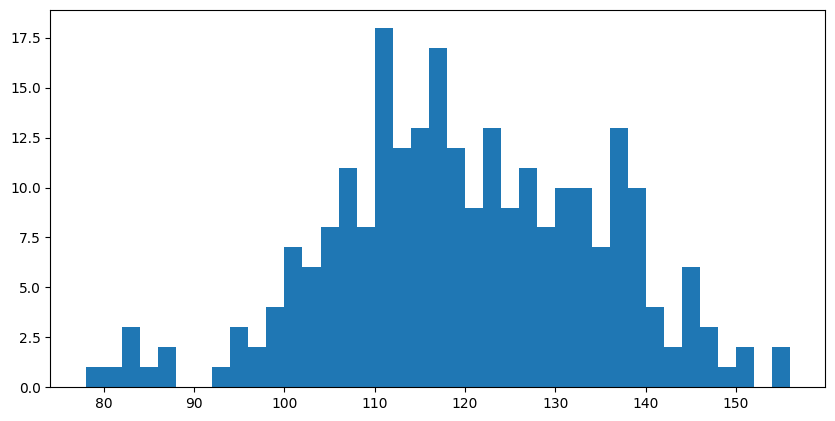

In [35]:
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]
plt.figure(figsize=(10, 5), dpi=100)  # 创建画布
group_num = int((max(time) - min(time)) / 2)  # 组数依赖于组距=2
plt.hist(time, bins=group_num)  # 绘制直方图
plt.show()

#### Plot
横坐标是index，纵坐标是特征的值

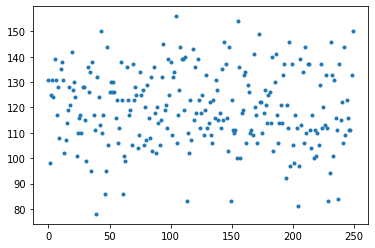

In [36]:
plt.plot(time, '.')
plt.show()

### 多特征关系

#### 折线图 Plot

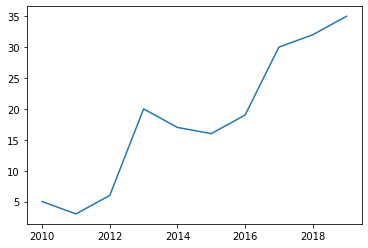

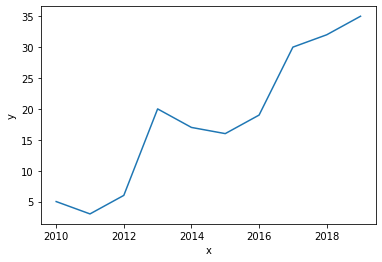

In [7]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]  # 数据准备
y = [5, 3, 6, 20, 17, 16, 19, 30, 32, 35]
plt.plot(x, y)  # 使用Matplotlib画折线图
plt.show()
df = pd.DataFrame({'x': x, 'y': y})  # 使用Seaborn画折线图
sns.lineplot(x="x", y="y", data=df)
plt.show()

#### 散点图 Scatter

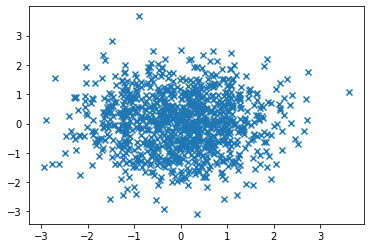

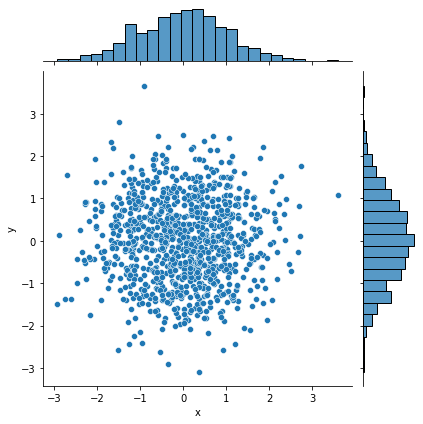

In [38]:
x = np.random.randn(1000)  # 数据准备
y = np.random.randn(1000)
plt.scatter(x, y, marker='x')  # 用Matplotlib画散点图
plt.show()
df = pd.DataFrame({'x': x, 'y': y})  # 用Seaborn画散点图
sns.jointplot(x="x", y="y", data=df, kind='scatter');
plt.show()

#### 矩阵散点图 scatter_matrix
多个特征排列组合的展示 scatter 散点图

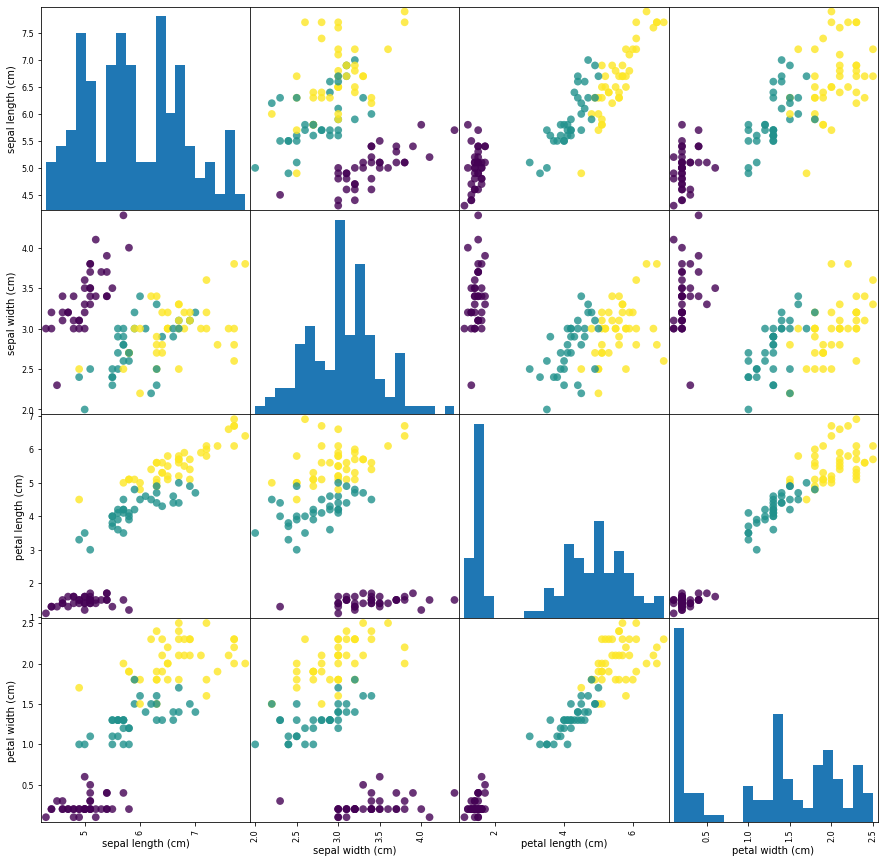

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
 
iris=load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris['data'],iris['target'],random_state=0)
iris_df = pd.DataFrame(X_train,columns=iris.feature_names)
grr = pd.plotting.scatter_matrix(iris_df,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8)
plt.show()